(5 Pts.) Demonstrate the different characteristics of the distribution of the page rank for the
Erdösz/Renyi model compared to the Barabasi/Albert graph model in an example (e.g. generate
random graph/s with similar number of nodes and edges for each model, compute page rank
and compare characteristics of the resulting value distribution such as moments).

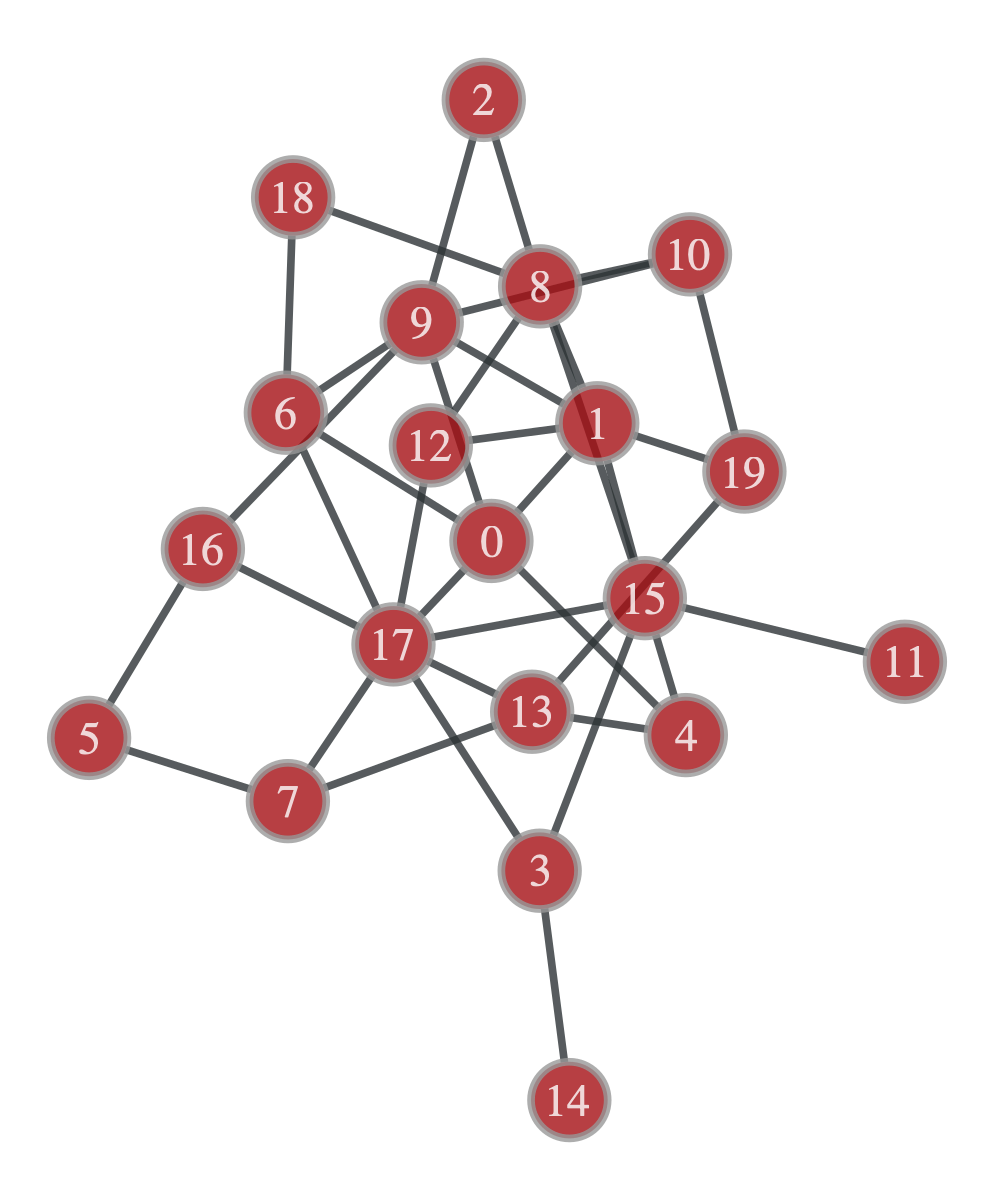

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x12fca6890, at 0x15be57010>

In [3]:
from graph_tool.all import *
import random
import matplotlib.pyplot as plt

num_vertices = 20 
p = 0.2

g = Graph(directed=False)

g.add_vertex(num_vertices)

for v1 in range(num_vertices):
    for v2 in range(v1 + 1, num_vertices):
        if random.random() < p:
            g.add_edge(g.vertex(v1), g.vertex(v2))
            



graph_draw(g,vertex_text=g.vertex_index)


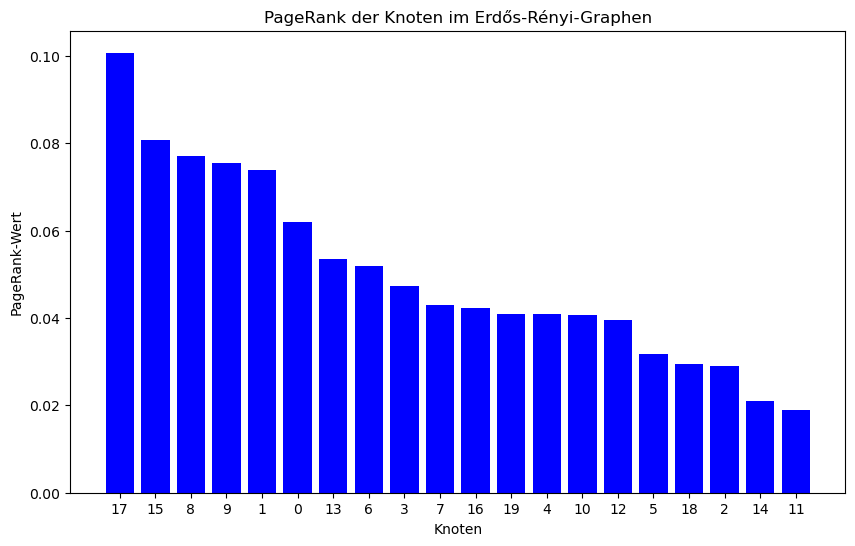

In [4]:
pr = pagerank(g)

pr_values = [pr[v] for v in g.vertices()]
vertices = list(range(num_vertices))

vertex_pr_pairs = list(zip(vertices, pr_values))

sorted_vertex_pr_pairs = sorted(vertex_pr_pairs, key=lambda x: x[1], reverse=True)

sorted_vertices = [pair[0] for pair in sorted_vertex_pr_pairs]
sorted_pr_values = [pair[1] for pair in sorted_vertex_pr_pairs]

plt.figure(figsize=(10, 6))
plt.bar(range(num_vertices), sorted_pr_values, tick_label=[v for v in sorted_vertices], color='blue')
plt.xlabel('Knoten')
plt.ylabel('PageRank-Wert')
plt.title('PageRank der Knoten im Erdős-Rényi-Graphen')
plt.xticks(vertices)
plt.show()

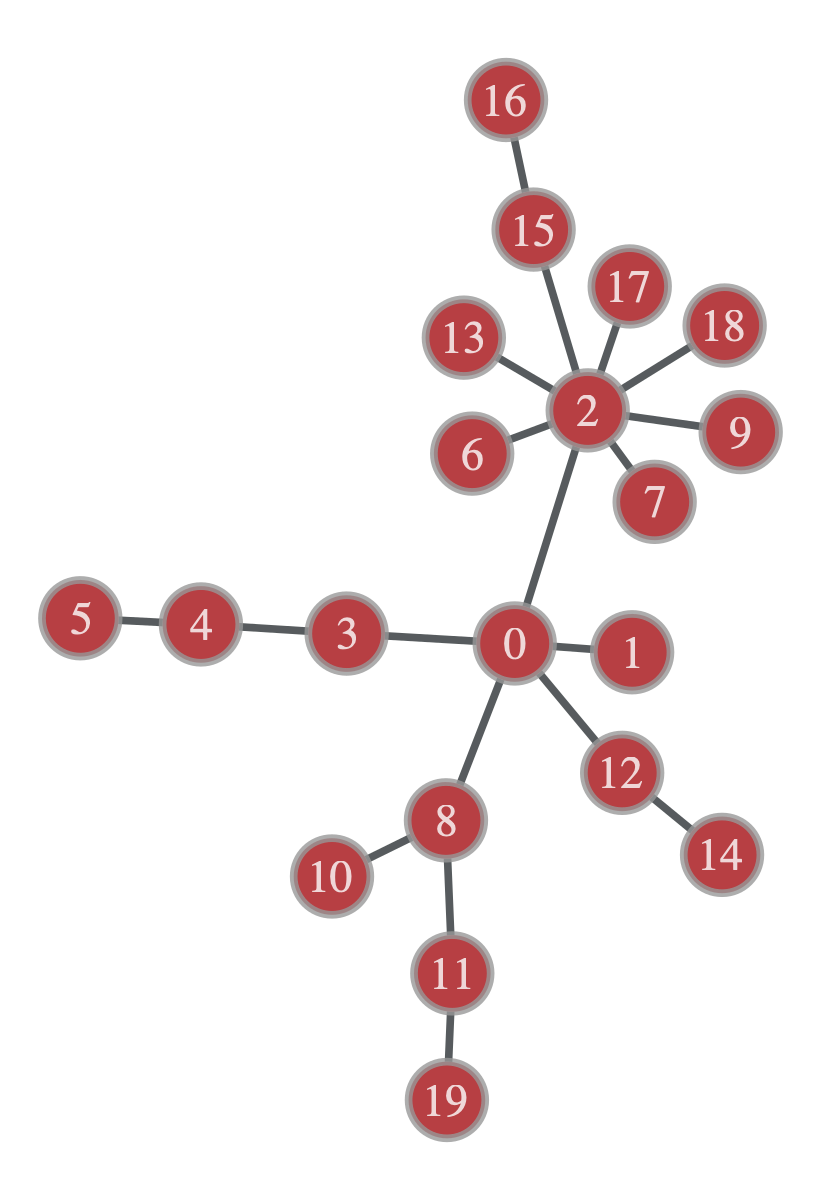

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x108469290, at 0x15c643f50>

In [5]:
import matplotlib
# took from https://graph-tool.skewed.de/static/doc/autosummary/graph_tool.generation.price_network.html
barbasiGraph = price_network(num_vertices, directed=False)
graph_draw(barbasiGraph,vertex_text=barbasiGraph.vertex_index)

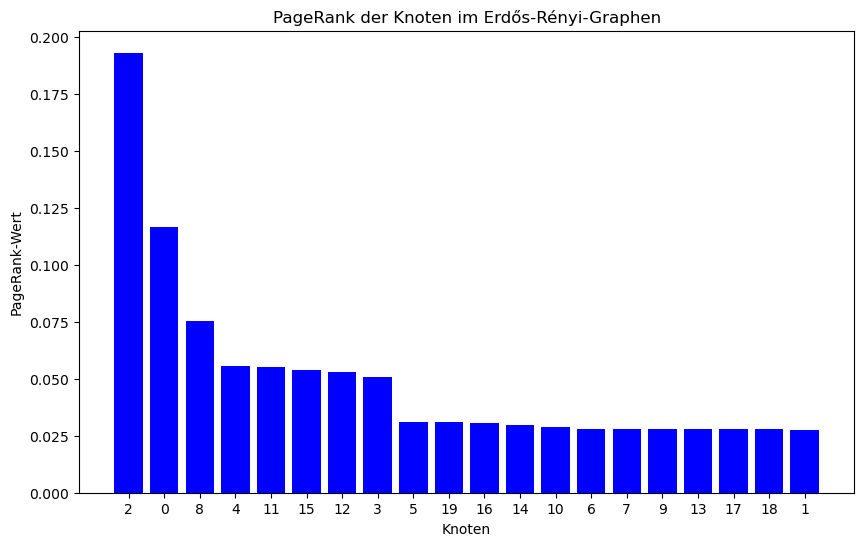

In [6]:
pr = pagerank(barbasiGraph)
pr_values = [pr[v] for v in barbasiGraph.vertices()]
vertices = list(range(num_vertices))

vertex_pr_pairs = list(zip(vertices, pr_values))

sorted_vertex_pr_pairs = sorted(vertex_pr_pairs, key=lambda x: x[1], reverse=True)

sorted_vertices = [pair[0] for pair in sorted_vertex_pr_pairs]
sorted_pr_values = [pair[1] for pair in sorted_vertex_pr_pairs]

plt.figure(figsize=(10, 6))
plt.bar(range(num_vertices), sorted_pr_values, tick_label=[v for v in sorted_vertices], color='blue')
plt.xlabel('Knoten')
plt.ylabel('PageRank-Wert')
plt.title('PageRank der Knoten im Erdős-Rényi-Graphen')
plt.xticks(sorted_vertices)
plt.show()